In [1]:
import pandas as pd
import numpy as np
import apogee.tools.read as apread
from matplotlib import pyplot as plt
import pylab as pl

In [2]:
from apogee.tools import bitmask

### Read in Binaries identified by KC IDL routine

In [3]:
x = pd.read_csv('KC_Binaries.csv',delimiter='\t')

In [4]:
KC_locID = x['Location_ID']
KC_apoID = x['Apogee_ID']
IND = x['ID']

In [5]:
list(KC_locID).index(4590)

2

In [6]:
KC_index = list(KC_apoID).index('2M00050265+0116236')

### Read in master list of DR13

In [7]:
y = pd.read_csv('/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR13/Bisector/Jessica/master_apStarList_DR13.csv',delim_whitespace=True)

In [8]:
y

,0,0.1,0.2,VESTA,1,apStar-r6-VESTA.fits,1/apStar-r6-VESTA.fits
0,0,0,0,2M00000032+5737103,4424,apStar-r6-2M00000032+5737103.fits,4424/apStar-r6-2M00000032+5737103.fits
1,0,0,0,2M00000032+5737103,4264,apStar-r6-2M00000032+5737103.fits,4264/apStar-r6-2M00000032+5737103.fits
2,0,0,0,2M00000068+5710233,4264,apStar-r6-2M00000068+5710233.fits,4264/apStar-r6-2M00000068+5710233.fits
3,0,0,0,2M00000211+6327470,4591,apStar-r6-2M00000211+6327470.fits,4591/apStar-r6-2M00000211+6327470.fits
4,0,0,0,2M00000222+5625359,4264,apStar-r6-2M00000222+5625359.fits,4264/apStar-r6-2M00000222+5625359.fits
5,0,0,0,2M00000233+1452324,4548,apStar-r6-2M00000233+1452324.fits,4548/apStar-r6-2M00000233+1452324.fits
6,0,0,0,2M00000317+5821383,4424,apStar-r6-2M00000317+5821383.fits,4424/apStar-r6-2M00000317+5821383.fits
7,0,0,0,2M00000446+5854329,4424,apStar-r6-2M00000446+5854329.fits,4424/apStar-r6-2M00000446+5854329.fits
8,0,0,0,2M00000535+1504343,4548,apStar-r6-2M00000535+1504343.fits,4548/apStar-r6-2M00000535+1504343.fits
9,0,0,0,2M00000662+7528598,4287,apStar-r6-2M00000662+7528598.fits,4287/apStar-r6-2M00000662+7528598.fits


In [9]:
dr13_apoID = y['VESTA']
dr13_locID = y['1']

In [10]:
path = y['1/apStar-r6-VESTA.fits']
print(len(path[0]))

38


### Remove all apStarC files by comparing string lengths

In [11]:
dr13apogeeIDs = []
dr13locationIDs = []
for i in range(len(dr13_apoID)):
    if len(path[i]) != 39:
        dr13apogeeIDs.append(dr13_apoID[i])
        dr13locationIDs.append(dr13_locID[i])

In [12]:
print(len(dr13apogeeIDs))

152644


### Only store the actual binaries into an array for later use.
Here, I am removing the stars that had a '0' as an identifier. This indicates the star has been visually confirmed to be a non-binary.

In [13]:
KC_apogeeIDs = []
KC_locationIDs = []

for i in range(len(KC_apoID)):
    if IND[i] != 0:
        KC_apogeeIDs.append(KC_apoID[i])
        KC_locationIDs.append(KC_locID[i])
print(len(KC_apogeeIDs))

1071


### Match the KC sources with that in the master list 

In [14]:
match_apoID = []
match_locID = []
match_path = []

for j in range(len(KC_apogeeIDs)):
    name = KC_apogeeIDs[j]
    indx = list(dr13_apoID).index(name)
    match_apoID.append(dr13_apoID[indx])
    match_locID.append(dr13_locID[indx])
    match_path.append(path[indx])

In [15]:
KCApoID = []
KCLocID = []

for p in range(len(match_path)):
    if len(match_path[p]) != 39:
        KCApoID.append(match_apoID[p])
        KCLocID.append(match_locID[p])

In [16]:
print(len(KCApoID))

992


### Read in DR13 AllStar File

In [17]:
allStar = apread.allStar(rmcommissioning=True,main=False,ak=True, akvers = 'targ', adddist=False)

In [18]:
locationIDs = allStar['LOCATION_ID']
apogeeIDs = allStar['APOGEE_ID']
J_filter = allStar['J']
J_filterr = allStar['J_ERR']
H_filter = allStar['H']
H_filterr = allStar['H_ERR']
K_filter = allStar['K']
K_filterr = allStar['K_ERR']
SNRs = allStar['SNR']
WISE_4_5 = allStar['WISE_4_5']

### Remove the 'bit' from the apogee IDs

In [19]:
apogeeID = [s.decode('utf-8') for s in apogeeIDs]

In [20]:
ApogeeIDs = []
for b in range(len(apogeeID)):
    v = apogeeID[b].strip()
    ApogeeIDs.append(v)
print(ApogeeIDs[0])

2M00000032+5737103


### Find the J,K, and H values that correspond to KC binaries

In [21]:
KCapoID = []
KClocID = []
KC_J = []
KC_K = []
KC_H = []

for u in range(len(KCApoID)):
    names = KCApoID[u]
    try:
        indxs = list(ApogeeIDs).index(names)
        KCapoID.append(ApogeeIDs[indxs])
        KClocID.append(locationIDs[indxs])
        KC_K.append(K_filter[indxs])
        KC_J.append(J_filter[indxs])
        KC_H.append(H_filter[indxs])
    except ValueError:
        pass  

In [22]:
print(len(KCapoID))

905


In [23]:
KC_jh = []
KC_hk = []
for g in range(len(KC_J)):
    a = KC_J[g] - KC_H[g]
    b = KC_H[g] - KC_K[g]
    KC_jh.append(a)
    KC_hk.append(b)   

In [24]:
print(len(KC_hk))

905


### Read in the M-Dwarfs

In [25]:
mdwarf_indx = bitmask.bit_set(19,allStar['APOGEE_TARGET1'])
print(mdwarf_indx)

mdwarf_index = []
for z in range(len(mdwarf_indx)):
    b = mdwarf_indx[z]*1
    mdwarf_index.append(b)
#print(mdwarf_index)
from collections import Counter
Counter(mdwarf_index)
print(len(mdwarf_index))

[False False False ..., False False False]
155632


In [26]:
from collections import Counter
Counter(mdwarf_indx)

Counter({False: 154882, True: 750})

In [27]:
mlocation_IDs = []
mapogee_IDs = []
mJ = []
mJ_err = []
mH = []
mH_err = []
mK = []
mK_err = []
mSNR = []
mwise = []


for i in range(len(mdwarf_index)):
    if mdwarf_index[i] == 1:
        l = locationIDs[i]
        a = apogeeIDs[i]
        j = J_filter[i]
        h = H_filter[i]
        k = K_filter[i]
        j_err = J_filterr[i]
        h_err = H_filterr[i]
        k_err = K_filterr[i]
        s = SNRs[i]
        w = WISE_4_5[i]
        mlocation_IDs.append(l)
        mapogee_IDs.append(a)
        mJ.append(j)
        mH.append(h)
        mK.append(k)
        mJ_err.append(j_err)
        mH_err.append(h_err)
        mK_err.append(k_err)
        mSNR.append(s)
        mwise.append(w)

In [28]:
print(len(mJ))

750


### Find how many binaries are m-dwarfs and overplot these

In [29]:
mkc_apoID = []
mkc_locID = []
mkcj = []
mkch = []
mkck = []

for cc in range(len(KCApoID)):
    Name = KCApoID[cc]
    try:
        match = list(mlocation_IDs).index(Name)
        mkc_apoID.append(mapogee_IDs[match])
        mkc_locID.append(mlocation_IDs[match])
        mkck.append(mK[match])
        mkcj.append(mJ[match])
        mkch.append(mH[match])
    except ValueError:
        pass 

In [30]:
print(len(mkch))

0


### Plotting M-dwarfs and identified binaries over all of DR13

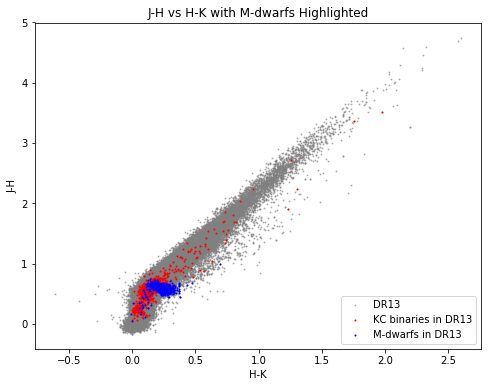

In [31]:
jh = []
hk = []

for y in range(len(J_filter)):
    x = J_filter[y] - H_filter[y]
    z = H_filter[y] - K_filter[y]
    jh.append(x)
    hk.append(z)
    
mjh = []
mhk = []
for n in range(len(mJ)):
    aa = mJ[n] - mH[n]
    bb = mH[n] - mK[n]
    mjh.append(aa)
    mhk.append(bb)
    
plt.figure(figsize=(8,6))
plt.scatter(hk,jh,s=1.0,color='gray',label='DR13',alpha=0.5)
plt.scatter(KC_hk,KC_jh,s=1.0,color='red',label='KC binaries in DR13')
plt.scatter(mhk,mjh,s=1.0,color='blue',label='M-dwarfs in DR13')
plt.xlabel('H-K')
plt.ylabel('J-H')
pl.legend(loc='lower right')
plt.title('J-H vs H-K with M-dwarfs Highlighted')
plt.savefig('CC_HK_vs_JH.pdf',dpi=1000)
plt.show()

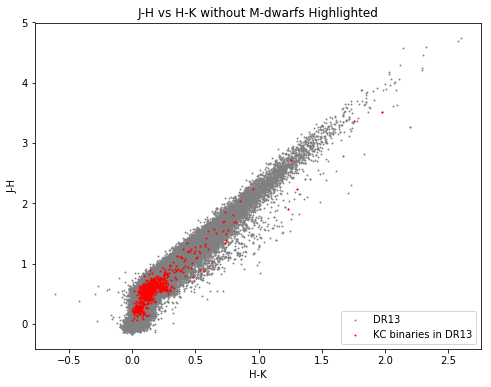

In [32]:
#Just the binaries and all of DR13
plt.figure(figsize=(8,6))
plt.scatter(hk,jh,s=0.80,color='gray',label='DR13',alpha=1.0)
plt.scatter(KC_hk,KC_jh,s=1.0,color='red',label='KC binaries in DR13')
#plt.scatter(mhk,mjh,s=1.0,color='blue',label='M-dwarfs in DR13')
plt.xlabel('H-K')
plt.ylabel('J-H')
pl.legend(loc='lower right')
plt.title('J-H vs H-K without M-dwarfs Highlighted')
plt.savefig('CC_HK_vs_JH_noMD.pdf',dpi=1000)
plt.show()

### Compare the M-Dwarfs to the KC Binaries

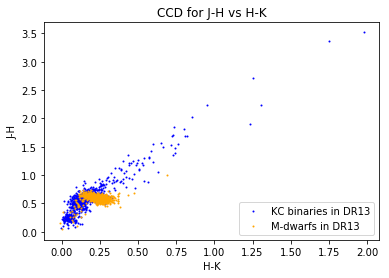

In [33]:
plt.scatter(KC_hk,KC_jh,s=1.0,color='blue',label='KC binaries in DR13')
plt.scatter(mhk,mjh,s=1.0,color='orange',label='M-dwarfs in DR13')
plt.xlabel('H-K')
plt.ylabel('J-H')
pl.legend(loc='lower right')
plt.title('CCD for J-H vs H-K')
plt.savefig('MD_vs_KC_CCD',dpi=1000)
plt.show()

### 2D Histogram of DR13 stars

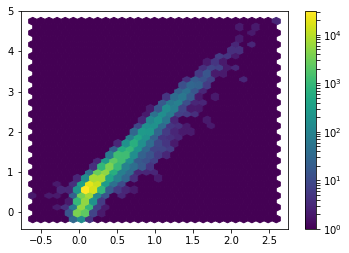

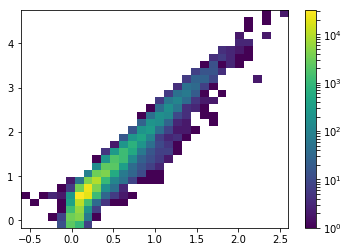

In [34]:
from matplotlib.colors import LogNorm

#Hexbin 2D histogram
fig, ax = plt.subplots()
im = ax.hexbin(hk,jh,gridsize=30,norm=LogNorm())
fig.colorbar(im,ax=ax)

#Normal 2D histogram
fig, ax = plt.subplots()
H = ax.hist2d(hk,jh,bins=(30,30),norm=LogNorm())
fig.colorbar(H[3],ax=ax)
plt.show()

#### Attempting to make contours of above

### Let's try using a package that Jacob recommended for dealing with histograms and contour plots!

In [125]:
Data = np.vstack([hk,jh]).T
type(Data)
print(Data.shape)
print(Data[0])

(155632, 2)
[ 0.15200043  0.2699995 ]


### Plot the 2D histogram with the 1D histograms of H-K and J-H to look at distribution

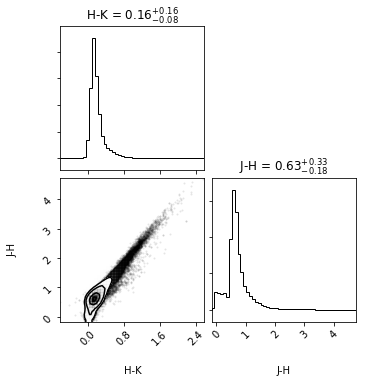

In [137]:
import corner
labels = ['H-K','J-H']
Bounds = [np.amin(Data),np.amax(Data)]

fig = corner.corner(Data,bins=50,labels=labels,smooth=1.2,show_titles=True,scale_hist=True,
                    plot_contours=True,hist2d_kwargs=False,top_ticks=False)
plt.show()

In [144]:
jh = np.array(jh)
hk = np.array(hk)

In [191]:
hfont = {'fontname':'Times New Roman'}

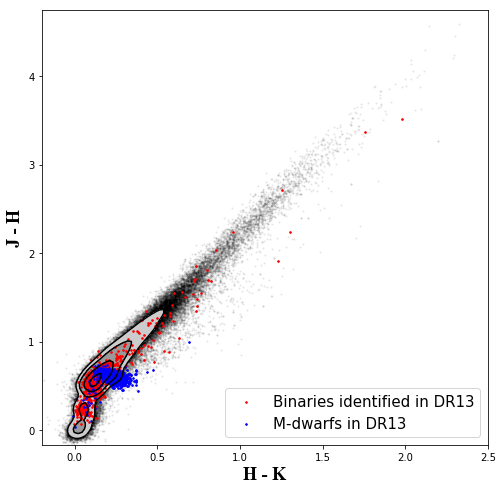

In [201]:
plt.figure(figsize=(8,8))
corner.hist2d(hk,jh,bins=150,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.scatter(KC_hk,KC_jh,s=2.5,color='red',label='Binaries identified in DR13')
plt.scatter(mhk,mjh,s=2.5,color='blue',label='M-dwarfs in DR13')
plt.xlim(-0.2,2.5)
plt.xlabel('H - K',fontsize=18,**hfont)
plt.ylabel('J - H',fontsize=18,**hfont)
pl.legend(loc='lower right',fontsize=15)
plt.savefig('2D_Hist_for_Kevin.pdf')
#plt.savefig('2D_Hist_for_Kevin_woMD.pdf')
plt.show()